## Self-Organizing Map of RGB Colors

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
n_in = 3
nr, nc = 10, 10
w = np.random.rand(nr, nc, 3)
nb = int(np.sqrt(nr))
lr = 0.01
dist = np.zeros([nr, nc])

In [ ]:
for i in range(30000):
    rand_in = np.random.rand(1, 1, 3)  # generate a random example
    dist = np.sum(np.absolute(w - rand_in), 2)
    best = np.where(dist == np.amin(dist))
    best_r, best_c = best[0][0], best[1][0]
    
    if best_r - nb < 0:
        w_eligible = w[:best_r+nb, ...]
    elif best_r + nb > nr - 1:
        w_eligible = w[best_r-nb:, ...]
    else:
        w_eligible = w[best_r-nb:best_r+nb, ...]
        
    if best_c - nb < 0:
        w_eligible = w_eligible[:, :best_c+nb, :]
    elif best_c + nb > nc -1:
        w_eligible = w_eligible[:, best_c-nb:, :]
    else:
        w_eligible = w_eligible[:, best_c-nb:best_c+nb, :]
        
    
    
    w_eligible = w[best_r-1:best_r+2, best_c-1:best_c+2, :]
    w_eligible += (lr * (rand_in - w_eligible))
    w[best_r-1:best_r+2, best_c-1:best_c+2, :] = w_eligible

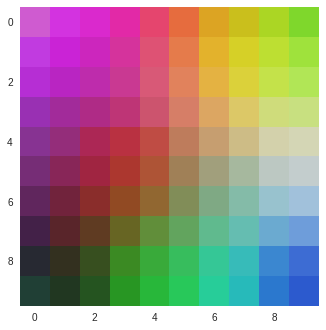

In [ ]:
plt.imshow(w)
plt.grid(False)
plt.show()